## MP1 - CELINE YOUSSEF
### Functions definition

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

In [5]:
def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)

In [6]:
def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

In [7]:
def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

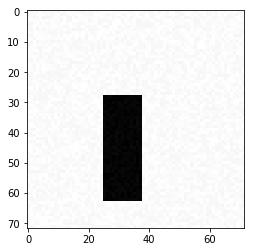

In [8]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

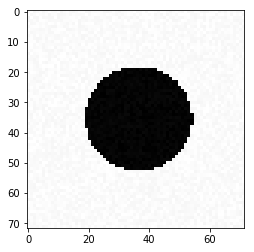

In [9]:
im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

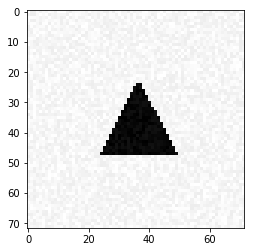

In [10]:
[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [11]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [12]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3)   
    return [X_test, Y_test]

In [13]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [14]:
import matplotlib.patches as patches

In [15]:
def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

In [16]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

 # 3 -  Simple Classification

In [214]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [100]:
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

In [133]:
np_utils.to_categorical(Y_train,3)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0

## SGD

In [139]:
model = Sequential()
# First layer
model.add(Dense(64, activation='relu', input_shape=(5184,)))

# Second layer
model.add(Dense(64, activation='relu', input_shape=(5184,)))

#Third Layer
model.add(Dense(64, activation='relu', input_shape=(5184,)))

# Output layer
model.add(Dense(3, activation='softmax'))

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [140]:
model.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
300/300 [==============================] - 1s 3ms/step - loss: 1.1595 - acc: 0.3767
Epoch 2/100
300/300 [==============================] - 0s 214us/step - loss: 1.0196 - acc: 0.4900
Epoch 3/100
300/300 [==============================] - 0s 206us/step - loss: 0.9958 - acc: 0.4233
Epoch 4/100
300/300 [==============================] - 0s 213us/step - loss: 0.8943 - acc: 0.5667
Epoch 5/100
300/300 [==============================] - 0s 218us/step - loss: 0.9876 - acc: 0.5500
Epoch 6/100
300/300 [==============================] - 0s 217us/step - loss: 0.8393 - acc: 0.6667
Epoch 7/100
300/300 [==============================] - 0s 221us/step - loss: 0.8644 - acc: 0.6100
Epoch 8/100
300/300 [==============================] - 0s 218us/step - loss: 0.6844 - acc: 0.6767
Epoch 9/100
300/300 [==============================] - 0s 209us/step - loss: 0.5689 - acc: 0.7833
Epoch 10/100
300/300 [==============================] - 0s 214us/step - loss: 0.6905 - acc: 0.7033
Epoch 11/100
300/300 

300/300 [==============================] - 0s 248us/step - loss: 0.1318 - acc: 0.9333
Epoch 84/100
300/300 [==============================] - 0s 239us/step - loss: 0.0949 - acc: 0.9600
Epoch 85/100
300/300 [==============================] - 0s 207us/step - loss: 0.1270 - acc: 0.9333
Epoch 86/100
300/300 [==============================] - 0s 193us/step - loss: 0.1497 - acc: 0.9367
Epoch 87/100
300/300 [==============================] - 0s 201us/step - loss: 0.1057 - acc: 0.9567
Epoch 88/100
300/300 [==============================] - 0s 215us/step - loss: 0.0632 - acc: 0.9900
Epoch 89/100
300/300 [==============================] - 0s 197us/step - loss: 0.1418 - acc: 0.9333
Epoch 90/100
300/300 [==============================] - 0s 194us/step - loss: 0.1132 - acc: 0.9567
Epoch 91/100
300/300 [==============================] - 0s 197us/step - loss: 0.0852 - acc: 0.9767
Epoch 92/100
300/300 [==============================] - 0s 248us/step - loss: 0.1323 - acc: 0.9400
Epoch 93/100
300/300 [=

In [141]:
#SIMPLE CLASSSIFICATION using SGD
#disk
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])

In [142]:
Y_predicted = model.predict(X_test)
Y_predicted

array([[0., 1., 0.]], dtype=float32)

In [195]:
#triangle
X_test, _ = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

In [196]:
#rectangle
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

## Adam

In [215]:
model2 = Sequential()
# First layer
model2.add(Dense(64, activation='relu', input_shape=(5184,)))

# Second layer
model2.add(Dense(64, activation='relu', input_shape=(5184,)))

#Third Layer
model2.add(Dense(64, activation='relu', input_shape=(5184,)))

# Output layer
model2.add(Dense(3, activation='softmax'))

adam = Adam(lr=3e-4)
model2.compile(optimizer= 'adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [216]:
model2.fit(X_train, Y_train, batch_size=32, epochs=100)
#SIMPLE CLASSSIFICATION using adam

#disk
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])

Epoch 1/100
300/300 [==============================] - 1s 4ms/step - loss: 1.1201 - acc: 0.4233
Epoch 2/100
300/300 [==============================] - 0s 298us/step - loss: 0.6510 - acc: 0.7567
Epoch 3/100
300/300 [==============================] - 0s 296us/step - loss: 0.5017 - acc: 0.7700
Epoch 4/100
300/300 [==============================] - 0s 298us/step - loss: 0.5285 - acc: 0.7233
Epoch 5/100
300/300 [==============================] - 0s 298us/step - loss: 0.3740 - acc: 0.8100
Epoch 6/100
300/300 [==============================] - 0s 325us/step - loss: 0.3065 - acc: 0.8367
Epoch 7/100
300/300 [==============================] - 0s 358us/step - loss: 0.2724 - acc: 0.8633
Epoch 8/100
300/300 [==============================] - 0s 330us/step - loss: 0.3277 - acc: 0.8433
Epoch 9/100
300/300 [==============================] - 0s 296us/step - loss: 0.2589 - acc: 0.8867
Epoch 10/100
300/300 [==============================] - 0s 293us/step - loss: 0.3417 - acc: 0.8100
Epoch 11/100
300/300 

300/300 [==============================] - 0s 338us/step - loss: 7.6540e-04 - acc: 1.0000
Epoch 84/100
300/300 [==============================] - 0s 350us/step - loss: 7.0571e-04 - acc: 1.0000
Epoch 85/100
300/300 [==============================] - 0s 336us/step - loss: 6.9875e-04 - acc: 1.0000
Epoch 86/100
300/300 [==============================] - 0s 333us/step - loss: 7.0099e-04 - acc: 1.0000
Epoch 87/100
300/300 [==============================] - 0s 340us/step - loss: 6.7503e-04 - acc: 1.0000
Epoch 88/100
300/300 [==============================] - 0s 360us/step - loss: 6.1194e-04 - acc: 1.0000
Epoch 89/100
300/300 [==============================] - 0s 375us/step - loss: 6.0475e-04 - acc: 1.0000
Epoch 90/100
300/300 [==============================] - 0s 350us/step - loss: 6.0299e-04 - acc: 1.0000
Epoch 91/100
300/300 [==============================] - 0s 304us/step - loss: 5.6905e-04 - acc: 1.0000
Epoch 92/100
300/300 [==============================] - 0s 321us/step - loss: 5.6780e-

In [145]:
Y_predicted = model2.predict(X_test)
Y_predicted

array([[0., 1., 0.]], dtype=float32)

In [197]:
#triangle
X_test, _ = generate_a_triangle()
X_test = X_test.reshape(1, X_test.shape[0])
model2.predict(X_test)

array([[0., 0., 1.]], dtype=float32)

In [198]:
#rectangle
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
model2.predict(X_test)

array([[1., 0., 0.]], dtype=float32)

### Predict with a Large Dataset

In [146]:
[X_test, Y_test] = generate_dataset_classification(300, 20)
Y_test = np_utils.to_categorical(Y_test)

#sgd
model.predict(X_test)

#adam
model2.predict(X_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


array([[6.67250497e-05, 1.25060295e-10, 9.99933243e-01],
       [9.99384403e-01, 1.48473337e-04, 4.67075384e-04],
       [9.98606384e-01, 1.23428076e-03, 1.59419084e-04],
       [9.99815166e-01, 1.21750782e-04, 6.30879804e-05],
       [1.87352671e-05, 1.55164302e-11, 9.99981284e-01],
       [9.99904752e-01, 6.56996635e-05, 2.96136386e-05],
       [1.29154796e-04, 9.99864936e-01, 5.83948076e-06],
       [2.71017198e-05, 4.46831070e-12, 9.99972939e-01],
       [4.56900816e-05, 5.14014560e-11, 9.99954343e-01],
       [9.99886274e-01, 2.11553088e-05, 9.25607310e-05],
       [6.98775839e-05, 9.99929428e-01, 7.08033610e-07],
       [4.75413472e-05, 6.89275720e-12, 9.99952435e-01],
       [3.08304661e-05, 8.22257817e-11, 9.99969125e-01],
       [3.55012271e-05, 1.15681085e-11, 9.99964476e-01],
       [9.99776065e-01, 6.35335018e-05, 1.60378782e-04],
       [1.35475158e-04, 9.99863386e-01, 1.11431268e-06],
       [2.86880357e-04, 9.99711215e-01, 1.90384424e-06],
       [9.99875903e-01, 7.40613

# 4 - Visualization of the Solution

### SGD Visualize first 3 columns

In [174]:
w = model.get_weights()[0]
w.shape

(5184, 64)

In [175]:
w1= w[:,0]
w1

array([-0.01924062, -0.03137353, -0.01120904, ..., -0.01520097,
       -0.01218335,  0.00075174], dtype=float32)

In [161]:
w2= w[:,1]
w2

array([ 0.01138431,  0.01081369, -0.0299284 , ..., -0.02860246,
       -0.02293311,  0.00238511], dtype=float32)

In [179]:
w3=w[:,2]
w3

array([ 0.02011338, -0.01563949,  0.02235624, ..., -0.03384143,
       -0.03364375,  0.01932658], dtype=float32)

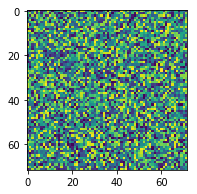

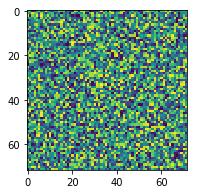

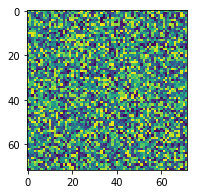

In [239]:
fig = plt.figure(figsize =(20,10))
plt.subplot(3,1,1)
plt.imshow(w1.reshape((IMAGE_SIZE, IMAGE_SIZE)))

fig = plt.figure(figsize =(20,10))
plt.subplot(3,1,2)
plt.imshow(w2.reshape((IMAGE_SIZE, IMAGE_SIZE)))

fig = plt.figure(figsize =(20,10))
plt.subplot(3,1,3)
plt.imshow(w3.reshape((IMAGE_SIZE, IMAGE_SIZE)))


### Adam Visualize first 3 columns

In [241]:
W = model2.get_weights()[0]
W.shape

W1= W[:,0]
W2= W[:,1]
W3= W[:,2]

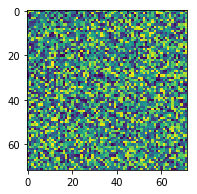

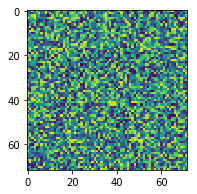

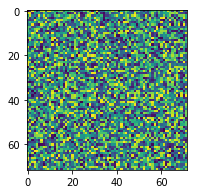

In [240]:
fig = plt.figure(figsize =(20,10))
plt.subplot(3,1,1)
plt.imshow(W1.reshape((IMAGE_SIZE, IMAGE_SIZE)))

fig = plt.figure(figsize =(20,10))
plt.subplot(3,1,2)
plt.imshow(W2.reshape((IMAGE_SIZE, IMAGE_SIZE)))

fig = plt.figure(figsize =(20,10))
plt.subplot(3,1,3)
plt.imshow(W3.reshape((IMAGE_SIZE, IMAGE_SIZE)))

### Created a model with ONE layer and visualized the solution (3 columns)

In [237]:
model_for_viz = Sequential()

model_for_viz.add(Dense(3, activation = "softmax", input_shape = (X_train.shape[1],)))
model_for_viz.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model_for_viz.fit(X_train, Y_train, batch_size=32, epochs = 50)

#get weights
m = model_for_viz.get_weights()[0]
m.shape

m1= m[:,0]
m2= m[:,1]
m3= m[:,2]


Epoch 1/50
300/300 [==============================] - 1s 3ms/step - loss: 1.5363 - acc: 0.4400
Epoch 2/50
300/300 [==============================] - 0s 133us/step - loss: 1.0153 - acc: 0.5200
Epoch 3/50
300/300 [==============================] - 0s 129us/step - loss: 0.6918 - acc: 0.6733
Epoch 4/50
300/300 [==============================] - 0s 142us/step - loss: 0.5470 - acc: 0.7733
Epoch 5/50
300/300 [==============================] - 0s 130us/step - loss: 0.3919 - acc: 0.8833
Epoch 6/50
300/300 [==============================] - 0s 144us/step - loss: 0.2999 - acc: 0.8900
Epoch 7/50
300/300 [==============================] - 0s 133us/step - loss: 0.2508 - acc: 0.9833
Epoch 8/50
300/300 [==============================] - 0s 141us/step - loss: 0.2327 - acc: 0.9400
Epoch 9/50
300/300 [==============================] - 0s 137us/step - loss: 0.2107 - acc: 0.9367
Epoch 10/50
300/300 [==============================] - 0s 138us/step - loss: 0.2074 - acc: 0.9267
Epoch 11/50
300/300 [==========

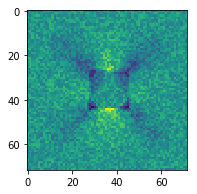

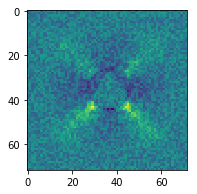

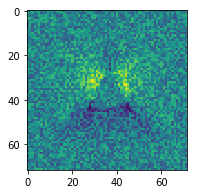

In [238]:
#plots solution
fig = plt.figure(figsize =(20,10))
plt.subplot(3,1,1)
plt.imshow(m1.reshape((IMAGE_SIZE, IMAGE_SIZE)))

fig = plt.figure(figsize =(20,10))
plt.subplot(3,1,2)
plt.imshow(m2.reshape((IMAGE_SIZE, IMAGE_SIZE)))

fig = plt.figure(figsize =(20,10))
plt.subplot(3,1,3)
plt.imshow(m3.reshape((IMAGE_SIZE, IMAGE_SIZE)))



# 5 - A More Difficult Classification Problem

### Evaluate classifier

In [224]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [225]:
Y_train = np_utils.to_categorical(Y_train,3)

In [189]:
#fit and evaluate SGD optimization
model = Sequential()
model.add(Dense(3, activation = "softmax", input_shape = (5184,)))

model.compile(optimizer = 'sgd', loss='mean_squared_error', metrics = ['accuracy'])

model.fit(X_train, Y_train, batch_size=8, epochs = 200)

Epoch 1/200
300/300 [==============================] - 1s 2ms/step - loss: 0.2700 - acc: 0.4233
Epoch 2/200
300/300 [==============================] - 0s 232us/step - loss: 0.2152 - acc: 0.5633
Epoch 3/200
300/300 [==============================] - 0s 225us/step - loss: 0.1898 - acc: 0.6233
Epoch 4/200
300/300 [==============================] - 0s 230us/step - loss: 0.1348 - acc: 0.7033
Epoch 5/200
300/300 [==============================] - 0s 232us/step - loss: 0.1125 - acc: 0.7533
Epoch 6/200
300/300 [==============================] - 0s 236us/step - loss: 0.1102 - acc: 0.7533
Epoch 7/200
300/300 [==============================] - 0s 225us/step - loss: 0.1001 - acc: 0.8033
Epoch 8/200
300/300 [==============================] - 0s 227us/step - loss: 0.1041 - acc: 0.7633
Epoch 9/200
300/300 [==============================] - 0s 229us/step - loss: 0.0656 - acc: 0.8667
Epoch 10/200
300/300 [==============================] - 0s 245us/step - loss: 0.0658 - acc: 0.8733
Epoch 11/200
300/300 

300/300 [==============================] - 0s 254us/step - loss: 0.0038 - acc: 1.0000
Epoch 84/200
300/300 [==============================] - 0s 242us/step - loss: 0.0031 - acc: 1.0000
Epoch 85/200
300/300 [==============================] - 0s 235us/step - loss: 0.0038 - acc: 1.0000
Epoch 86/200
300/300 [==============================] - 0s 263us/step - loss: 0.0041 - acc: 0.9967
Epoch 87/200
300/300 [==============================] - 0s 264us/step - loss: 0.0033 - acc: 1.0000
Epoch 88/200
300/300 [==============================] - 0s 262us/step - loss: 0.0033 - acc: 0.9967
Epoch 89/200
300/300 [==============================] - 0s 222us/step - loss: 0.0032 - acc: 1.0000
Epoch 90/200
300/300 [==============================] - 0s 233us/step - loss: 0.0031 - acc: 1.0000
Epoch 91/200
300/300 [==============================] - 0s 216us/step - loss: 0.0034 - acc: 0.9967
Epoch 92/200
300/300 [==============================] - 0s 225us/step - loss: 0.0031 - acc: 1.0000
Epoch 93/200
300/300 [=

300/300 [==============================] - 0s 222us/step - loss: 0.0015 - acc: 1.0000
Epoch 166/200
300/300 [==============================] - 0s 290us/step - loss: 0.0016 - acc: 1.0000
Epoch 167/200
300/300 [==============================] - 0s 301us/step - loss: 0.0016 - acc: 1.0000
Epoch 168/200
300/300 [==============================] - 0s 255us/step - loss: 0.0014 - acc: 1.0000
Epoch 169/200
300/300 [==============================] - 0s 215us/step - loss: 0.0015 - acc: 1.0000
Epoch 170/200
300/300 [==============================] - 0s 224us/step - loss: 0.0013 - acc: 1.0000
Epoch 171/200
300/300 [==============================] - 0s 235us/step - loss: 0.0014 - acc: 1.0000
Epoch 172/200
300/300 [==============================] - 0s 255us/step - loss: 0.0014 - acc: 1.0000
Epoch 173/200
300/300 [==============================] - 0s 268us/step - loss: 0.0013 - acc: 1.0000
Epoch 174/200
300/300 [==============================] - 0s 245us/step - loss: 0.0014 - acc: 1.0000
Epoch 175/200


In [229]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [203]:
#evaluation
model.evaluate(X_test,Y_test)

300/300 [==============================] - 1s 2ms/step


[0.36324459592501324, 0.3199999992052714]

#### The accuracy is low as we can see just above - around 30%

### Convolution

In [226]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

model3 = Sequential()

model3.add(Conv2D(64, kernel_size=(5, 5), activation = "relu", input_shape = (IMAGE_SIZE, IMAGE_SIZE, 1)))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(3, activation = "softmax"))
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [231]:
X_trainn = X_train.reshape(300, IMAGE_SIZE, IMAGE_SIZE, 1)
model3.fit(X_trainn, Y_train, batch_size=32, epochs = 10)

Epoch 1/10
300/300 [==============================] - 2s 8ms/step - loss: 0.1126 - acc: 0.9967
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0866 - acc: 1.0000
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0627 - acc: 0.9967
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0469 - acc: 1.0000
Epoch 5/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0401 - acc: 1.0000
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0356 - acc: 1.0000
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0283 - acc: 0.9967
Epoch 8/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0220 - acc: 1.0000
Epoch 9/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0181 - acc: 1.0000
Epoch 10/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0166 - acc: 1.0000


In [234]:
X_testt = X_test.reshape(300, IMAGE_SIZE, IMAGE_SIZE, 1)
model3.evaluate(X_testt, Y_test)

300/300 [==============================] - 1s 2ms/step


[2.3012301890055338, 0.26666666666666666]

# 6 - A Regression Problem

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


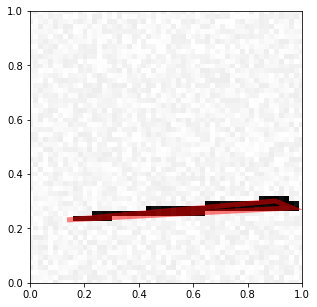

In [246]:
#train dataset
[X_train_reg, Y_train_reg] = generate_dataset_regression(300, 20)
visualize_prediction(X_train_reg[1], Y_train_reg[1])

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


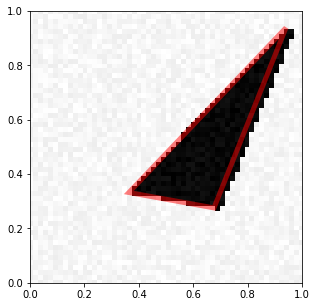

In [245]:
#test dataset
[X_test_reg, Y_test_reg] = generate_test_set_regression()
visualize_prediction(X_test_reg[0], Y_test_reg[0])

In [276]:
#Normalize dataset before training and testing -> vertices of triangle

def norm_triangle(Y):
    ab = [Y[2*k] for k in range(3)]
    ordo = [Y[2*k+1] for k in range(3)]
    Y_norm = []
    for i in range(3):    
        y_index = np.argmin(ab)
        Y_norm.append(ab[y_index])
        Y_norm.append(ordo[y_index])
        del ab[y_index]
        del ordo[y_index]
    return Y_norm

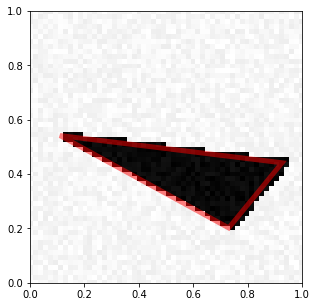

In [278]:
#reshape X_train_reg and normalize Y_train_reg
X_train_reg2 = X_train_reg.reshape(300, IMAGE_SIZE, IMAGE_SIZE, 1)
Y_train_reg_norm = np.array([norm_triangle(Y_train_reg[k]) for k in range(300)])


#visualize X_train and Y_train
visualize_prediction(X_train_reg[0], Y_train_reg_norm[0])

In [279]:
#model regression

model = Sequential()
model.add(Conv2D(32, activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1), kernel_size=(5,5)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6))

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(X_train_reg2, Y_train_reg_norm, epochs=30, batch_size=32,validation_split=0.3, shuffle=True, verbose=1)


Train on 210 samples, validate on 90 samples
Epoch 1/30
210/210 [==============================] - 4s 20ms/step - loss: 0.1648 - acc: 0.4238 - val_loss: 0.0849 - val_acc: 0.0778
Epoch 2/30
210/210 [==============================] - 2s 11ms/step - loss: 0.0781 - acc: 0.3714 - val_loss: 0.0675 - val_acc: 0.6111
Epoch 3/30
210/210 [==============================] - 2s 11ms/step - loss: 0.0641 - acc: 0.5524 - val_loss: 0.0573 - val_acc: 0.6111
Epoch 4/30
210/210 [==============================] - 2s 11ms/step - loss: 0.0536 - acc: 0.5571 - val_loss: 0.0437 - val_acc: 0.6111
Epoch 5/30
210/210 [==============================] - 2s 12ms/step - loss: 0.0414 - acc: 0.5619 - val_loss: 0.0429 - val_acc: 0.6222
Epoch 6/30
210/210 [==============================] - 2s 11ms/step - loss: 0.0394 - acc: 0.5810 - val_loss: 0.0378 - val_acc: 0.5889
Epoch 7/30
210/210 [==============================] - 3s 13ms/step - loss: 0.0352 - acc: 0.6238 - val_loss: 0.0330 - val_acc: 0.5889
Epoch 8/30
210/210 [====

In [280]:
#reshape X_test_reg and normalize Y_test_reg
X_test_reg2 = X_test_reg.reshape(300, IMAGE_SIZE, IMAGE_SIZE, 1)
Y_test_reg_norm = np.array([norm_triangle(Y_test_reg[k]) for k in range(300)])

#evaluate
model.evaluate(X_test_reg2, Y_test_reg_norm)

300/300 [==============================] - 1s 3ms/step


[0.0199265868216753, 0.6933333333333334]

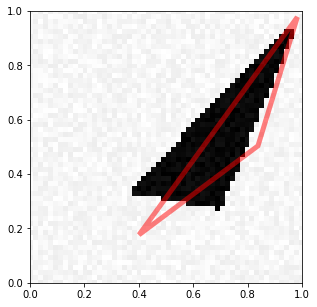

In [281]:
#visualize predicition
#first pred
visualize_prediction(X_test_reg2[0], model.predict(X_test_reg2[0].reshape(1, IMAGE_SIZE, IMAGE_SIZE, 1)))

# 7 - Image Denoising

## Modify functions definitions

In [282]:
def generate_a_drawing_noise(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata_noise, imdata

def generate_a_rectangle_noise(free_location=False):
    noise = np.random.randint(0,100) #generate noise value randomly
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing_noise(figsize, U, V, noise)

def generate_a_disk_noise(free_location=False):
    noise = np.random.randint(0,100)  #generate noise value randomly
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing_noise(figsize, U, V, noise)
  
def generate_a_triangle_noise(free_location=False):
    noise = np.random.randint(0,100) #generate noise value randomly
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing_noise(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

def generate_dataset_noise(nb_samples, free_location=False):
    # Getting im_size:
    noise = np.random.randint(0,100)  #generate noise value randomly
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,2,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle_noise(free_location)
        elif category == 1: 
            X[i] = generate_a_disk_noise(free_location)
        else:
            [X[i], V] = generate_a_triangle_noise(free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

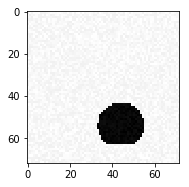

In [299]:
#plot a disk with noise 
im = generate_a_disk_noise(True)
plt.subplot(1,2,2)
plt.imshow(im[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### Start training and testing for different figures with noise

In [324]:
#generate train set
trainset, cat = generate_dataset_noise(1000)

#prepare training set and reshape
X_train = trainset[:,0]
Y_train = trainset[:,1]

X_train = X_train.reshape(1000,IMAGE_SIZE,IMAGE_SIZE,1)
Y_train = Y_train.reshape(1000,IMAGE_SIZE,IMAGE_SIZE,1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [325]:
#model
from keras.models import Input, Model
from keras.layers import UpSampling2D, Conv2D, MaxPooling2D

inp = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))


x = Conv2D(32, (3, 3), activation='relu', padding='same')(inp)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [326]:
model_denoiser = Model(inp, output)
model_denoiser.compile(optimizer="adam", loss='binary_crossentropy')
model_denoiser.fit(X_train, Y_train, epochs=10, batch_size=128,validation_split=0.2, shuffle=True, verbose=1)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 19s 24ms/step - loss: 0.6446 - val_loss: 0.6213
Epoch 2/10
800/800 [==============================] - 15s 19ms/step - loss: 0.6057 - val_loss: 0.5982
Epoch 3/10
800/800 [==============================] - 15s 18ms/step - loss: 0.5834 - val_loss: 0.5646
Epoch 4/10
800/800 [==============================] - 15s 18ms/step - loss: 0.5519 - val_loss: 0.5360
Epoch 5/10
800/800 [==============================] - 14s 18ms/step - loss: 0.5274 - val_loss: 0.5196
Epoch 6/10
800/800 [==============================] - 14s 18ms/step - loss: 0.5132 - val_loss: 0.5077
Epoch 7/10
800/800 [==============================] - 15s 18ms/step - loss: 0.5059 - val_loss: 0.5056
Epoch 8/10
800/800 [==============================] - 15s 19ms/step - loss: 0.5043 - val_loss: 0.5028
Epoch 9/10
800/800 [==============================] - 16s 20ms/step - loss: 0.5028 - val_loss: 0.5030
Epoch 10/10
800/800 [===============

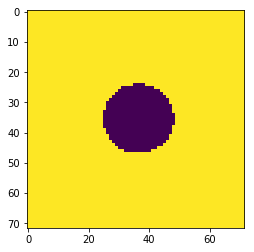

In [327]:
plt.imshow((model_denoiser.predict(X_train[0].reshape((1,IMAGE_SIZE,IMAGE_SIZE,1)))).reshape((IMAGE_SIZE,IMAGE_SIZE)))
plt.imshow((Y_train[0].reshape((IMAGE_SIZE,IMAGE_SIZE))))

In [328]:
#generate test set
testset, _ = generate_dataset_noise(10, 20)

#prepare test set and reshape
X_test = testset[:,0]
Y_test = testset[:,1]
X_test = X_test.reshape(10,IMAGE_SIZE,IMAGE_SIZE,1)
Y_test = Y_test.reshape(10,IMAGE_SIZE,IMAGE_SIZE,1)

Creating data:
0


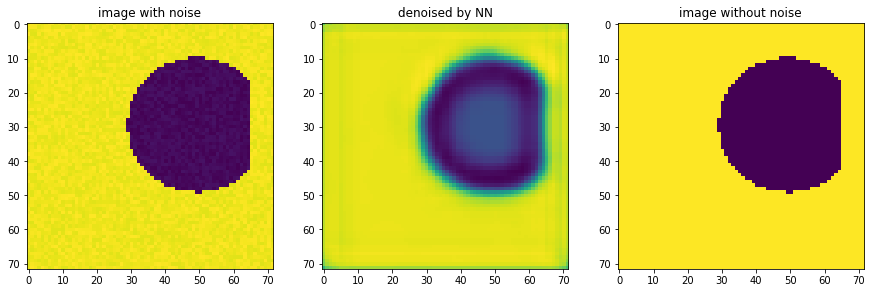

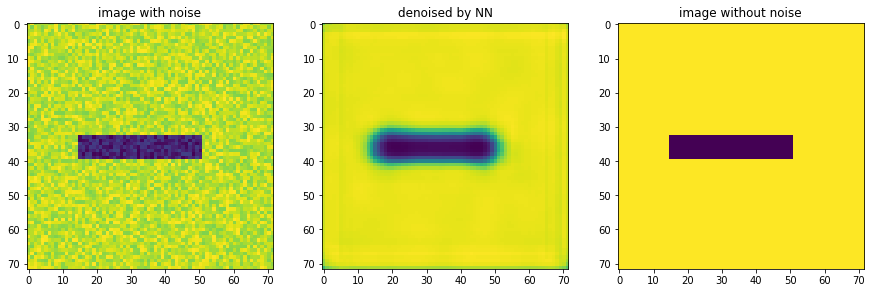

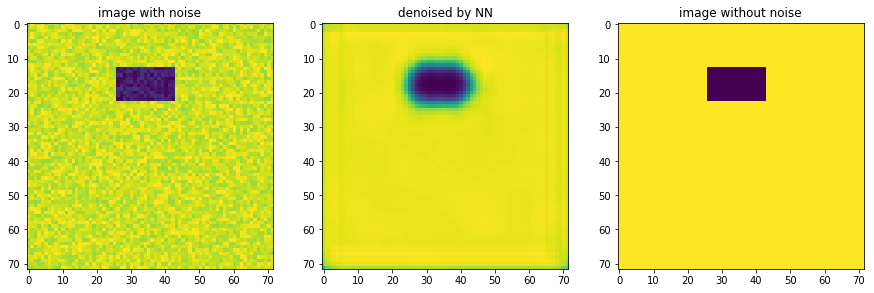

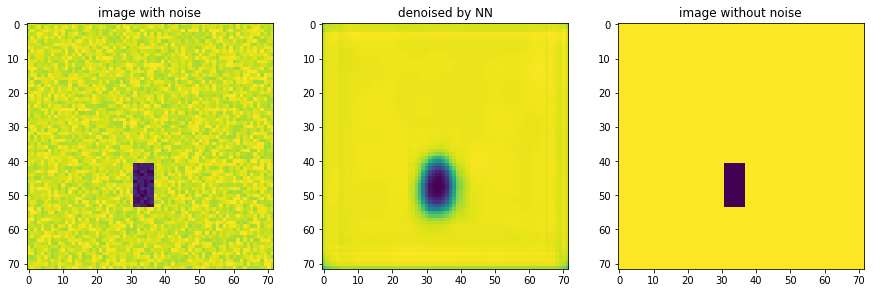

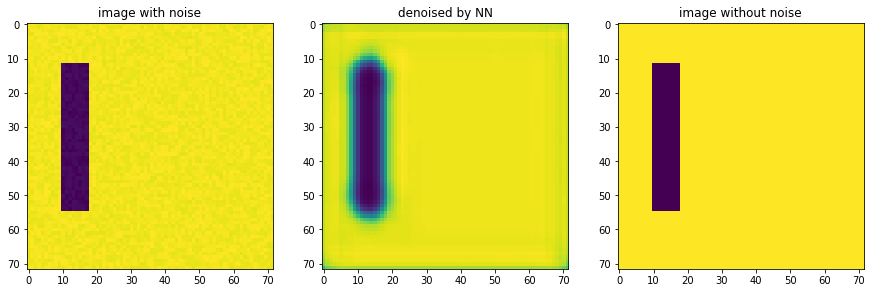

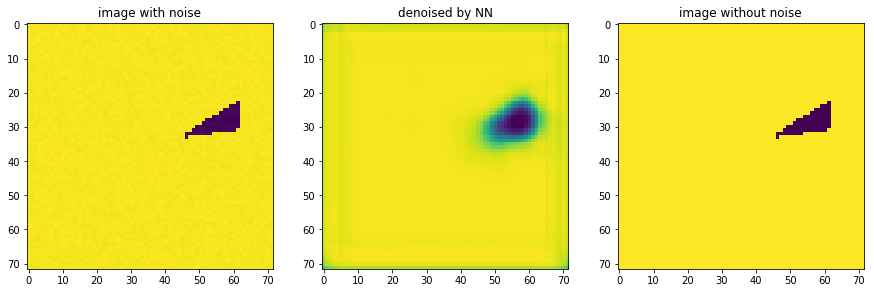

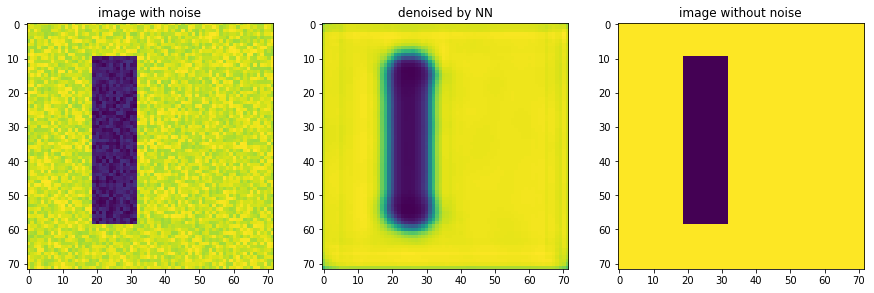

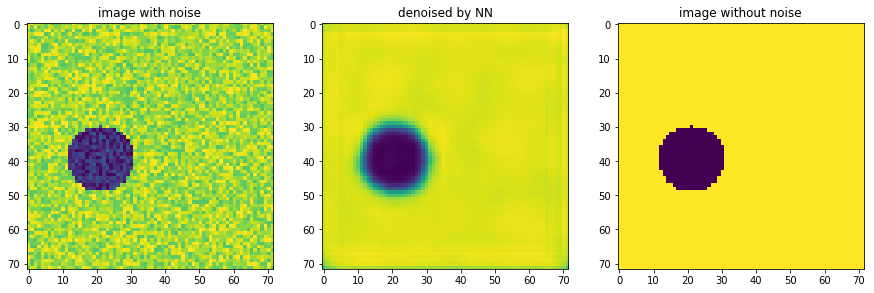

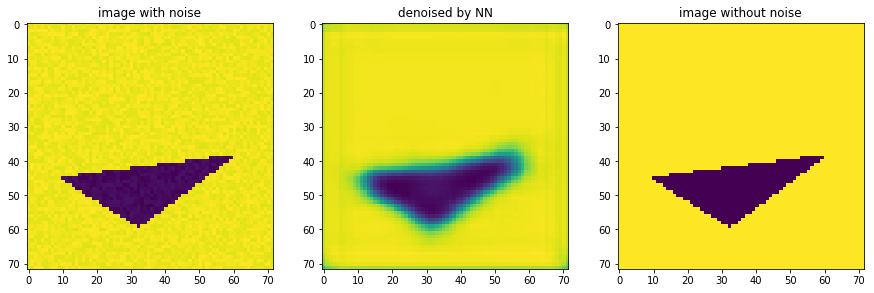

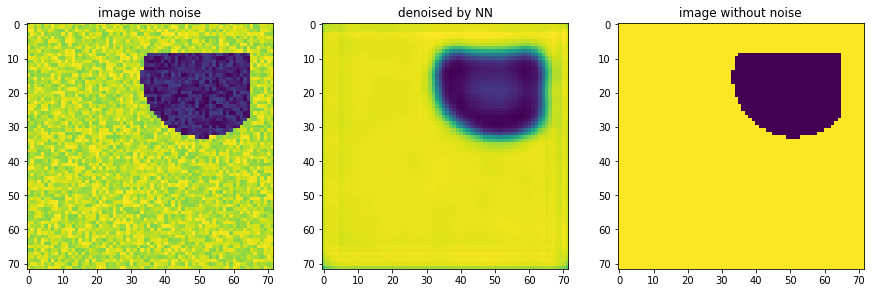

In [329]:
for j in range(10):
  fig = plt.figure(figsize = (15,30))
  fig.tight_layout()
    
  ax = plt.subplot(1, 3, 1)
  plt.imshow(X_test[j].reshape((IMAGE_SIZE,IMAGE_SIZE)))
  plt.title("image with noise")

  ax = plt.subplot(1, 3, 2)
  plt.imshow((model_denoiser.predict(X_test[j].reshape((1,IMAGE_SIZE,IMAGE_SIZE,1)))).reshape((IMAGE_SIZE,IMAGE_SIZE)))
  plt.title("denoised by NN")

  ax = plt.subplot(1, 3, 3)
  plt.imshow(Y_test[j].reshape((IMAGE_SIZE,IMAGE_SIZE)))
  plt.title("image without noise")
